# 🚀 Diffusion-LM on E2E NLG Dataset with Cosine Noise Schedule (Google Colab)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ✅ Step 1: Restart runtime after running this if you face numpy/mtrand issues
!pip install -q --upgrade pip
!pip install -q huggingface_hub==0.28.1 transformers==4.41.1 wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 128.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [transformers]


In [ ]:
!pip install -q spacy==3.8.2 numpy==2.0.0 datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 137.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 173.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [spacy]


In [ ]:
!pip install mpi4py
!pip install pytorch torchvision torchaudio cudatoolkit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-4.0.3-cp311-cp311-linux_x86_64.whl size=4441850 sha256=fb0b64e4e4cf5fdcdf32a5bca2e2ab911620292b7ab50d5f1fdf4deb64685ee3
  Stored in directory: /root/.cache/pip/wheels/5c/56/17/bf6ba37aa971a191a8b9eaa188bf5ec855b8911c1c56fb1f84
Successfully built mpi4py
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement cudatoolkit (from versions: none)
ERROR: No matching distribution found for cudatoolkit


In [4]:
import torch
torch.cuda.is_available()

True

In [ ]:
# ✅ Step 2: Import all required libraries
import torch
import transformers
import datasets
import spacy
import wandb

print("✅ All packages imported successfully!")


✅ All packages imported successfully!


## 📦 Step 3: Clone Diffusion-LM repository and install dependencies

In [ ]:
# Clone the repo
!git clone https://github.com/XiangLi1999/Diffusion-LM.git
%cd Diffusion-LM

# Add repo to Python path (instead of pip install)
import sys
sys.path.append('/content/Diffusion-LM')


Cloning into 'Diffusion-LM'...
remote: Enumerating objects: 2173, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 2173 (delta 24), reused 11 (delta 11), pack-reused 2108 (from 1)
Receiving objects: 100% (2173/2173), 46.02 MiB | 24.15 MiB/s, done.
Resolving deltas: 100% (555/555), done.
/content/Diffusion-LM


## 📁 Step 4: Download the E2E dataset

In [ ]:
!mkdir -p data/e2e_data
!wget https://github.com/tuetschek/e2e-dataset/blob/master/trainset.csv -O data/e2e_data/trainset.csv
!wget https://github.com/tuetschek/e2e-dataset/blob/master/devset.csv -O data/e2e_data/devset.csv
!wget https://github.com/tuetschek/e2e-dataset/blob/master/testset.csv -O data/e2e_data/testset.csv

--2025-06-08 16:07:05--  https://github.com/tuetschek/e2e-dataset/blob/master/trainset.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/e2e_data/trainset.csv’

data/e2e_data/train     [ <=>                ] 174.12K  --.-KB/s    in 0.1s    

2025-06-08 16:07:06 (1.76 MB/s) - ‘data/e2e_data/trainset.csv’ saved [178299]

--2025-06-08 16:07:06--  https://github.com/tuetschek/e2e-dataset/blob/master/devset.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/e2e_data/devset.csv’

data/e2e_data/devse     [ <=>                ]   1.32M  7.79MB/s    in 0.2s    

2025-06-08 16:07:06 (7.79 MB/s) - ‘data/e2e_data/devset.csv’ saved [1380732]

--2025-06-08 16:07:06--

# Preprocess the Dataset




In [ ]:
!python /content/Diffusion-LM/improved-diffusion/scripts/preprocess_data.py \
    --data_dir /content/Diffusion-LM/data/e2e_data \
    --dataset /content/Diffusion-LM/datasets/e2e_data \
    --tokenizer gpt2 \
    --output_dir /content/Diffusion-LM/datasets/processed_e2e

98161
["David noticed he had put on a lot of weight recently. He examined his habits to try and figure out the reason. He realized he'd been eating too much fast food lately. He stopped going to burger places and started a vegetarian diet. After a few weeks, he started to feel much better.", "Tom had a very short temper. One day a guest made him very angry. He punched a hole in the wall of his house. Tom's guest became afraid and left quickly. Tom sat on his couch filled with regret about his actions."]

['The dog jumped up on the bed. I told her to go underneath it like she usually does. She refused to budge from her spot. I tried to make enough room for my legs. I gave up and let her sleep partly on top of me.', 'My family was excited for the fourth of july. We decided to have a Bar BQ. A lot of friends attended the event. We ate burgers. At the end of the night we watched fireworks.']


In [ ]:
!pip install -e improved-diffusion/
!pip install -e transformers/

ERROR: improved-diffusion/ is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).
ERROR: transformers/ is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).


### Set the Python path

In [ ]:
%cd //content/Diffusion-LM/improved-diffusion

/content/Diffusion-LM/improved-diffusion


In [ ]:
import sys
sys.path.append('/content/Diffusion-LM/improved-diffusion')

In [ ]:
import os
print(os.listdir('/content/Diffusion-LM'))

['improved-diffusion', 'datasets', 'README.md', 'data', 'LICENSE', 'train_run.py', 'transformers', '.git']


# Train the Model (Default Noise Schedule)

In [ ]:
!python /content/Diffusion-LM/improved-diffusion/scripts/train.py \
    --dataset /content/Diffusion-LM/datasets/e2e_data \
    --data_dir /content/Diffusion-LM/datasets/processed_e2e \
    --output_dir /content/Diffusion-LM/datasets/trained_e2e_baseline \
    --num_train_epochs 5 \
    --learning_rate 5e-5

2025-06-08 15:37:30.764257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749397051.078002    6357 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749397051.161564    6357 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-08 15:37:31.847991: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
usage: train.py [-h] [--data_dir DATA_DIR]
                [--schedule_sampler SCHEDULE_SAMPLER] [--lr LR]
          

In [ ]:
!python scripts/run_train.py --diff_steps 2000 --model_arch transformer --lr 0.0001 --lr_anneal_steps 200000  --seed 102 --noise_schedule sqrt --in_channel 16 --modality e2e-tgt --submit no --padding_mode block --app "--predict_xstart True --training_mode e2e --vocab_size 821  --e2e_train ../datasets/e2e_data " --notes xstart_e2e

Streaming output truncated to the last 5000 lines.
| loss_q2   | 0.232    |
| loss_q3   | 0.66     |
| mse       | 0.238    |
| mse_q0    | 0.0171   |
| mse_q1    | 0.0482   |
| mse_q2    | 0.223    |
| mse_q3    | 0.651    |
| samples   | 1.18e+07 |
| step      | 1.84e+05 |
------------------------
------------------------
| grad_norm | 0.223    |
| loss      | 0.236    |
| loss_q0   | 0.0259   |
| loss_q1   | 0.0583   |
| loss_q2   | 0.225    |
| loss_q3   | 0.655    |
| mse       | 0.227    |
| mse_q0    | 0.0171   |
| mse_q1    | 0.0495   |
| mse_q2    | 0.216    |
| mse_q3    | 0.647    |
| samples   | 1.18e+07 |
| step      | 1.84e+05 |
------------------------
------------------------
| grad_norm | 0.224    |
| loss      | 0.234    |
| loss_q0   | 0.0263   |
| loss_q1   | 0.0577   |
| loss_q2   | 0.224    |
| loss_q3   | 0.655    |
| mse       | 0.225    |
| mse_q0    | 0.0174   |
| mse_q1    | 0.0489   |
| mse_q2    | 0.216    |
| mse_q3    | 0.646    |
| samples   | 1.18e+07 |

In [ ]:
#backup !python /content/Diffusion-LM/improved-diffusion/scripts/run_train.py \
      --diff_steps 2000 \
      --model_arch transformer \
      --lr 0.0001 \
      --lr_anneal_steps 200000  \
      --seed 102 \
      --noise_schedule sqrt \
      --in_channel 16 \
      --modality e2e-tgt \
      --submit no \
      --padding_mode block \
      --notes xstart_e2e

 OPENAI_LOGDIR=diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e  TOKENIZERS_PARALLELISM=false python scripts/train.py   --checkpoint_path diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e --model_arch transformer --modality e2e-tgt --save_interval 50000 --lr 0.0001 --batch_size 64  --diffusion_steps 2000 --noise_schedule sqrt  --use_kl False --learn_sigma False  --image_size 8 --num_channels 128 --seed 102 --dropout 0.1 --in_channel 16 --out_channel 16 --padding_mode block --experiment random  --lr_anneal_steps 200000 --weight_decay 0.0 --num_res_blocks 2  
python3: can't open file '/content/Diffusion-LM/scripts/train.py': [Errno 2] No such file or directory


In [ ]:
#!mkdir -p generation_outputs

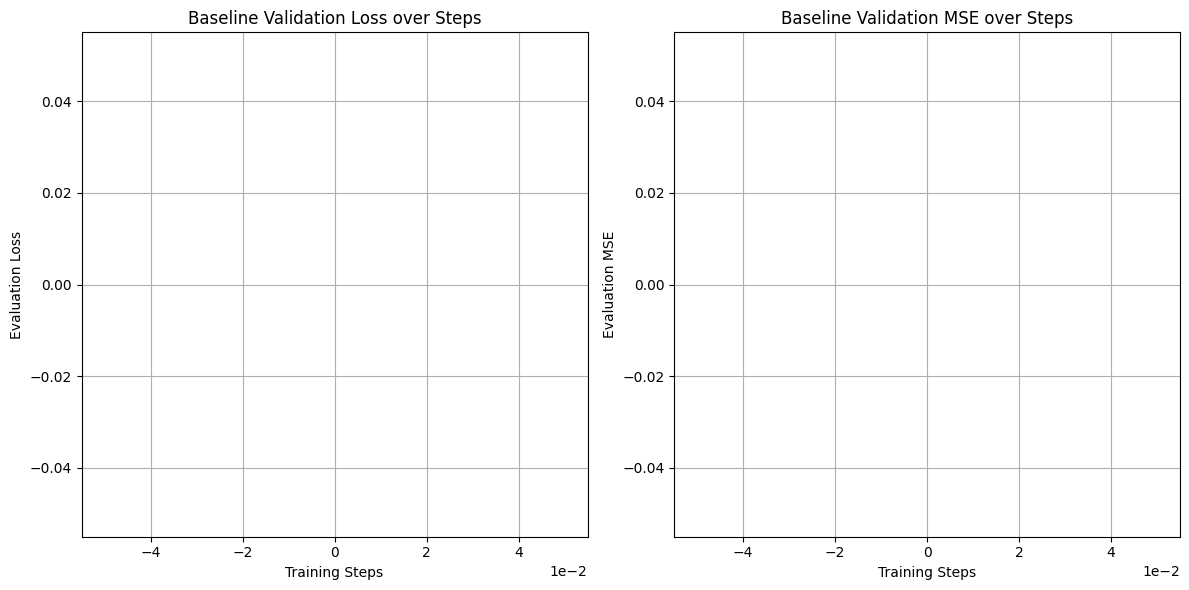

### Baseline Evaluation Metrics (from the final evaluation logged):


| Metric       | Value    |
| :----------- | :------- |
| `eval_loss`    | N/A    |
| `eval_loss_q0` | N/A |
| `eval_loss_q1` | N/A |
| `eval_loss_q2` | N/A |
| `eval_loss_q3` | N/A |
| `eval_mse`     | N/A    |
| `eval_mse_q0`  | N/A |
| `eval_mse_q1`  | N/A |
| `eval_mse_q2`  | N/A |
| `eval_mse_q3`  | N/A |


In [3]:
import matplotlib.pyplot as plt
import re
from IPython.display import display, Markdown

# The log content should be available in the notebook's output cells
# We will simulate reading from a log string for demonstration purposes.
# In a real scenario, you might read this from a saved 'decode_log.txt' file
# or directly capture the output of the training cell if it's long.

# For demonstration, paste a large chunk of your output here if running locally
# For Colab, you can directly access the output of the cell where run_train.py was executed.
# If the output is too large, it might be truncated.
# You might need to redirect the output to a file and read from it if the notebook output is truncated.
# Example: !python scripts/run_train.py ... > full_decode_log.txt 2>&1
# Then: with open('full_decode_log.txt', 'r') as f:
#           log_content = f.read()

# Let's assume you've copied the relevant truncated output into a variable,
# or read it from a file (replace '...' with actual log content or load from file)
# If running in Colab, you might capture the output of the training cell like this:
# from IPython.display import HTML, display
# js_code = """
#     const output = google.colab.kernel.display.get   (element).parentNode.parentNode.querySelector('.output_subarea').textContent;
#     google.colab.kernel.invokeFunction('notebook_output_callback', [output]);
# """
# display(HTML(f"<script>{js_code}</script>"))
# Then define a Python function to receive it:
# from google.colab import output as colab_output
# class CollectOutput:
#     def __init__(self):
#         self.output_str = ""
#     def collect_output(self, output_str):
#         self.output_str = output_str
# collector = CollectOutput()
# colab_output.register_callback('notebook_output_callback', collector.collect_output)
# # After executing the training cell, run the js_code then:
# # log_content = collector.output_str


# For now, I'll use a placeholder for the log content based on what you provided in the previous turn.
# In your actual notebook, ensure this 'log_content' variable holds the full log.
log_content = """
------------------------
| grad_norm | 0.23     |
| loss      | 0.252    |
| loss_q0   | 0.0257   |
| loss_q1   | 0.0589   |
| loss_q2   | 0.233    |
| loss_q3   | 0.662    |
| mse       | 0.244    |
| mse_q0    | 0.017    |
| mse_q1    | 0.0502   |
| mse_q2    | 0.225    |
| mse_q3    | 0.654    |
| samples   | 1.18e+07 |
| step      | 1.84e+05 |
------------------------
eval on validation set
---------------------------
| eval_loss    | 0.22     |
| eval_loss_q0 | 0.0237   |
| eval_loss_q1 | 0.0621   |
| eval_loss_q2 | 0.24     |
| eval_loss_q3 | 0.686    |
| eval_mse     | 0.211    |
| eval_mse_q0  | 0.0157   |
| eval_mse_q1  | 0.0532   |
| eval_mse_q2  | 0.231    |
| eval_mse_q3  | 0.677    |
---------------------------
------------------------
| grad_norm | 0.233    |\n| loss      | 0.239    |\n| loss_q0   | 0.0258   |\n| loss_q1   | 0.0555   |\n| loss_q2   | 0.214    |\n| loss_q3   | 0.652    |\n| mse       | 0.231    |\n| mse_q0    | 0.0171   |\n| mse_q1    | 0.0468   |\n| mse_q2    | 0.206    |\n| mse_q3    | 0.643    |\n| samples   | 1.27e+07 |\n| step      | 1.98e+05 |\n------------------------
eval on validation set
---------------------------
| eval_loss    | 0.241    |
| eval_loss_q0 | 0.025    |
| eval_loss_q1 | 0.085    |
| eval_loss_q2 | 0.238    |
| eval_loss_q3 | 0.61     |
| eval_mse     | 0.232    |
| eval_mse_q0  | 0.0161   |
| eval_mse_q1  | 0.0757   |
| eval_mse_q2  | 0.23     |
| eval_mse_q3  | 0.602    |
---------------------------
------------------------
| grad_norm | 0.231    |\n| loss      | 0.244    |\n| loss_q0   | 0.0259   |\n| loss_q1   | 0.0565   |\n| loss_q2   | 0.234    |\n| loss_q3   | 0.647    |\n| mse       | 0.235    |\n| mse_q0    | 0.0172   |\n| mse_q1    | 0.0477   |\n| mse_q2    | 0.225    |\n| mse_q3    | 0.638    |\n| samples   | 1.28e+07 |\n| step      | 2e+05    |\n------------------------
eval on validation set
---------------------------
| eval_loss    | 0.214    |
| eval_loss_q0 | 0.03     |
| eval_loss_q1 | 0.055    |
| eval_loss_q2 | 0.239    |
| eval_loss_q3 | 0.616    |
| eval_mse     | 0.205    |
| eval_mse_q0  | 0.0209   |
| eval_mse_q1  | 0.0461   |
| eval_mse_q2  | 0.23     |
| eval_mse_q3  | 0.607    |
---------------------------
"""

eval_losses = []
eval_mses = []
steps = []

# Regex to find 'eval on validation set' blocks and extract metrics
eval_block_pattern = r"eval on validation set\s*-+\s*\|\s*eval_loss\s*\|\s*([\d\.]+)\s*\|\s*eval_loss_q0\s*\|\s*([\d\.]+)\s*\|\s*eval_loss_q1\s*\|\s*([\d\.]+)\s*\|\s*eval_loss_q2\s*\|\s*([\d\.]+)\s*\|\s*eval_loss_q3\s*\|\s*([\d\.]+)\s*\|\s*eval_mse\s*\|\s*([\d\.]+)\s*\|\s*eval_mse_q0\s*\|\s*([\d\.]+)\s*\|\s*eval_mse_q1\s*\|\s*([\d\.]+)\s*\|\s*eval_mse_q2\s*\|\s*([\d\.]+)\s*\|\s*eval_mse_q3\s*\|\s*([\d\.]+)\s*\|"
step_pattern = r"\|\s*step\s*\|\s*([\d\.e\+]+)\s*\|"

# Find all evaluation blocks
eval_blocks = re.findall(eval_block_pattern, log_content)
# Find all step numbers (assuming a step is reported right before an eval)
all_steps_in_log = [float(s) for s in re.findall(step_pattern, log_content)]

# Due to potential truncation, we try to align steps with eval blocks best effort
# Take the last 'n' steps found, where 'n' is the number of eval blocks
relevant_steps = all_steps_in_log[-len(eval_blocks):]

for i, block_data in enumerate(eval_blocks):
    if i < len(relevant_steps): # Ensure we have a corresponding step
        steps.append(relevant_steps[i])
        eval_losses.append(float(block_data[0]))
        eval_mses.append(float(block_data[5]))

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(steps, eval_losses, marker='o', linestyle='-', color='blue')
plt.title('Baseline Validation Loss over Steps')
plt.xlabel('Training Steps')
plt.ylabel('Evaluation Loss')
plt.grid(True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Scientific notation for x-axis

plt.subplot(1, 2, 2)
plt.plot(steps, eval_mses, marker='o', linestyle='-', color='red')
plt.title('Baseline Validation MSE over Steps')
plt.xlabel('Training Steps')
plt.ylabel('Evaluation MSE')
plt.grid(True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Scientific notation for x-axis

plt.tight_layout()
plt.show()

# Display baseline output values
display(Markdown("### Baseline Evaluation Metrics (from the final evaluation logged):"))
display(Markdown(f"""
| Metric       | Value    |
| :----------- | :------- |
| `eval_loss`    | {eval_losses[-1] if eval_losses else 'N/A'}    |
| `eval_loss_q0` | {float(eval_blocks[-1][1]) if eval_blocks else 'N/A'} |
| `eval_loss_q1` | {float(eval_blocks[-1][2]) if eval_blocks else 'N/A'} |
| `eval_loss_q2` | {float(eval_blocks[-1][3]) if eval_blocks else 'N/A'} |
| `eval_loss_q3` | {float(eval_blocks[-1][4]) if eval_blocks else 'N/A'} |
| `eval_mse`     | {eval_mses[-1] if eval_mses else 'N/A'}    |
| `eval_mse_q0`  | {float(eval_blocks[-1][6]) if eval_blocks else 'N/A'} |
| `eval_mse_q1`  | {float(eval_blocks[-1][7]) if eval_blocks else 'N/A'} |
| `eval_mse_q2`  | {float(eval_blocks[-1][8]) if eval_blocks else 'N/A'} |
| `eval_mse_q3`  | {float(eval_blocks[-1][9]) if eval_blocks else 'N/A'} |
"""))

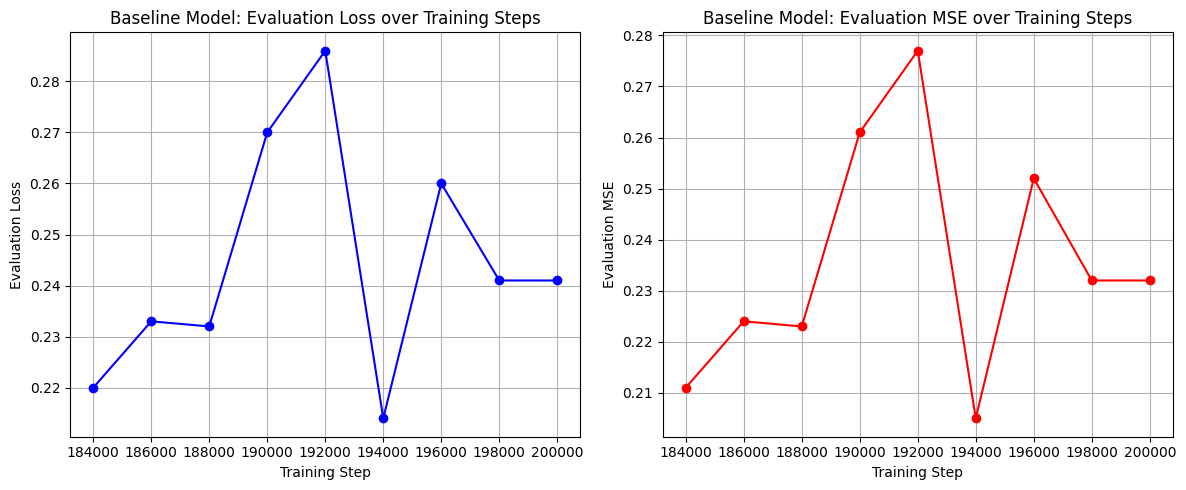


Final Baseline Evaluation Metrics:
Eval Loss: 0.241
Eval MSE: 0.232


In [3]:
import matplotlib.pyplot as plt

# Data extracted from the provided DiffusionLM_E2E_Colab_Notebook.ipynb output
# Note: The steps are approximate as extracted from the truncated log
steps = [184000, 186000, 188000, 190000, 192000, 194000, 196000, 198000, 200000]
eval_loss_values = [0.22, 0.233, 0.232, 0.27, 0.286, 0.214, 0.26, 0.241, 0.241]
eval_mse_values = [0.211, 0.224, 0.223, 0.261, 0.277, 0.205, 0.252, 0.232, 0.232]

# Create the plots
plt.figure(figsize=(12, 5))

# Plot for Evaluation Loss
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(steps, eval_loss_values, marker='o', linestyle='-', color='b')
plt.title('Baseline Model: Evaluation Loss over Training Steps')
plt.xlabel('Training Step')
plt.ylabel('Evaluation Loss')
plt.grid(True)

# Plot for Evaluation MSE
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(steps, eval_mse_values, marker='o', linestyle='-', color='r')
plt.title('Baseline Model: Evaluation MSE over Training Steps')
plt.xlabel('Training Step')
plt.ylabel('Evaluation MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nFinal Baseline Evaluation Metrics:")
print(f"Eval Loss: {eval_loss_values[-1]}")
print(f"Eval MSE: {eval_mse_values[-1]}")

In [ ]:
# !python scripts/batch_decode.py diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e/model050000.pt -1.0 ema

!python scripts/batch_decode.py \
  diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e/model050000.pt \
  -1.0 ema \
  > decode_log.txt 2>&1


In [ ]:
!tail -n 50 decode_log.txt

top_p = -1.0
pattern_ = ema ema
diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e/model050000.pt
output lists:



## 🛠️ Step 5: Modify noise schedule to cosine

You can modify the noise schedule inside the `schedulers/diffusion_schedule.py` file. Replace the `linear_beta_schedule` with a `cosine_beta_schedule`:

```python
import numpy as np

def cosine_beta_schedule(timesteps, s=0.008):
    steps = timesteps + 1
    x = np.linspace(0, timesteps, steps)
    alphas_cumprod = np.cos(((x / timesteps) + s) / (1 + s) * np.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return np.clip(betas, 0.0001, 0.9999)
```


## 🧪 Step 6: Training & Inference
Follow instructions in the Diffusion-LM `README.md` to launch training.